In [27]:
import pandas as pd
df_datos = pd.read_csv("datos.csv")
df_datos

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,NaN
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,NaN
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


In [28]:
df_datos.drop([1,3], axis=0, inplace=True)

In [29]:
df_datos

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
2,Juan Díaz,López,170,100.0
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0
10,Paula Pérez,Díaz,30,0.0
11,Ana Fernández,García,152,100.0


Se imprimen las medidas minimo, maximo, media y desviacion estandar para los campos de horas dedicadas y calificaciones obtenidas respectivamentes.

In [30]:
print(df_datos["horas_dedicadas"].min())
print(df_datos["horas_dedicadas"].max())
print(df_datos["horas_dedicadas"].mean())
print(df_datos["horas_dedicadas"].std())

18
178
108.0
54.28031817497453


In [31]:
print(df_datos["calificaciones_obtenida"].min())
print(df_datos["calificaciones_obtenida"].max())
print(df_datos["calificaciones_obtenida"].mean())
print(df_datos["calificaciones_obtenida"].std())

0.0
100.0
64.05555555555556
33.53921711917737


Se crea un modelo de regresión lineal usando Sci-Kit Learn con los datos de los alumnos anonimos.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
horas = np.array(df_datos["horas_dedicadas"])
print(horas)
calif = np.array(df_datos["calificaciones_obtenida"])
calif

[ 52 170 125  47 149 162 139  18  30 152  51 164  93 162  55 178  97 100]


array([ 45., 100.,  70.,  40., 100.,  80.,  45.,  30.,   0., 100.,   0.,
        98.,  60., 100.,  40.,  70.,  80.,  95.])

In [33]:
hour = horas.reshape(-1,1)
hour

array([[ 52],
       [170],
       [125],
       [ 47],
       [149],
       [162],
       [139],
       [ 18],
       [ 30],
       [152],
       [ 51],
       [164],
       [ 93],
       [162],
       [ 55],
       [178],
       [ 97],
       [100]])

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(hour,calif,test_size=.5, random_state=0)

modelo = LinearRegression()
modelo.fit(xtrain, ytrain)

pred = modelo.predict(xtest)

Se gráfican los datos originales y la función de regresión.

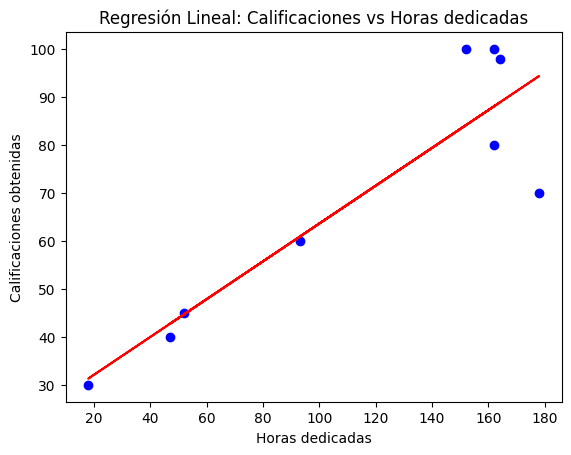

In [35]:
import matplotlib.pyplot as plt
plt.scatter(xtrain, ytrain, color='blue')
plt.plot(xtrain, modelo.predict(xtrain), color='red')
plt.title('Regresión Lineal: Calificaciones vs Horas dedicadas')
plt.xlabel('Horas dedicadas')
plt.ylabel('Calificaciones obtenidas')
plt.show()

Se realiza una predicción para el alumno Andrés Aldair Medina Rodriguez con número de cuenta 417108869.
Supongamos que el alumno dedico n horas a la materia, donde n es lo siguiente.

In [36]:
n = (4+1+7+1+0+8+8+6+9)%50
n

44

In [37]:
modelo.predict(np.array([[n]]))

array([41.55384459])

Con lo cual el alumno obtendria 41 de calificación

La Raíz del Error Cuadratico Medio mide el promedio de la diferencia entre nuestro modelo predictivo y los valores reales.

In [38]:
from sklearn.metrics import mean_squared_error
# r2_score, mean_absolute_error
#mse = mean_squared_error(ytest, pred)
#r2 = r2_score(ytest, pred)
#mae = mean_absolute_error(ytest, pred)
rmse = np.sqrt(mse)

# métricas para la regresión lineal
#print("Métricas de evaluación del modelo de regresión lineal:")
#print("MSE:", mse)
#print("R2:", r2)
#print("MAE:", mae)
print("RMSE:", rmse)

RMSE: 26.09005913890449


Es decir que en promedio, los el valor real esta al rededor de 26 puntos(de calificacion) al rededor del valor predicho.